In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font = fm.FontProperties(fname="/System/Library/Fonts/Hiragino Sans GB.ttc")
df = pd.read_csv("results.csv")
df["Total Hit Rate"] = df["Total Hit Rate"].apply(lambda x: float(x))
df["Load Hit Rate"] = df["Load Hit Rate"].apply(lambda x: float(x))
df["Store Hit Rate"] = df["Store Hit Rate"].apply(lambda x: float(x))
df["Total Run Time"] = df["Total Run Time"].apply(lambda x: int(x))
df["AVG MA Latency"] = df["AVG MA Latency"].apply(lambda x: float(x))

In [3]:
df.sort_values("Total Hit Rate").tail(4)

,Block Size,Associativity,Cache Size,Total Hit Rate,Load Hit Rate,Store Hit Rate,Total Run Time,AVG MA Latency
31,16,8,64,98.81,98.75,98.95,533676,2.186516
51,32,8,64,99.03,98.92,99.29,480076,1.966912
50,32,4,64,99.05,98.97,99.26,475076,1.946427
49,32,2,64,99.15,99.08,99.30,452476,1.853832


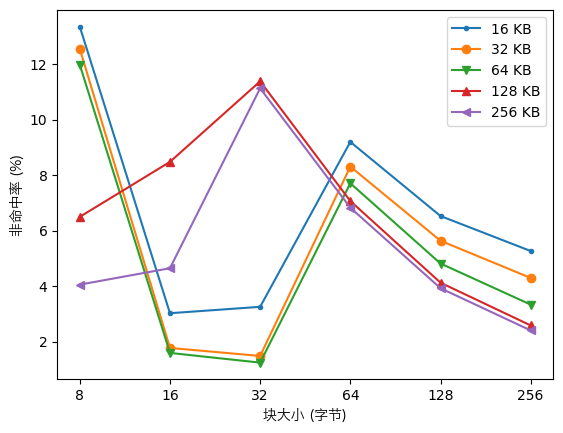

In [4]:
cache_sizes = [16, 32, 64, 128, 256]
cache_block_sizes = ['8', '16', '32', '64', '128', '256']

markers = ["."  , "o" , "v" , "^" , "<", ">"]

plt.xlabel("块大小 (字节)", font=font)
plt.ylabel("非命中率 (%)", font=font)

for marker, size in zip(markers, cache_sizes):
    plt.plot(cache_block_sizes, df[(df["Cache Size"] == size) & (df["Associativity"] == 1)]["Total Hit Rate"].apply(lambda x: 100.0 - x), label=f"{size} KB", marker=marker)
plt.legend()
plt.show()

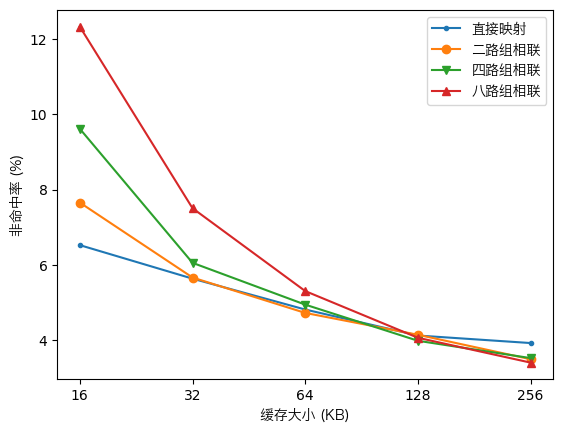

In [5]:
cache_assocs = [1, 2, 4, 8]
cache_sizes = ['16', '32', '64', '128', '256']
markers = ["."  , "o" , "v" , "^" , "<", ">"]

plt.xlabel("缓存大小 (KB)", font=font)
plt.ylabel("非命中率 (%)", font=font)


def get_assoc_label(assoc):
    if assoc == 1:
        return "直接映射"
    if assoc == 2:
        return "二路组相联"
    if assoc == 4:
        return "四路组相联"
    if assoc == 8:
        return "八路组相联"

for marker, assoc in zip(markers, cache_assocs):
    plt.plot(cache_sizes, df[(df["Block Size"] == 128) & (df["Associativity"] == assoc)]["Total Hit Rate"].apply(lambda x: 100.0 - x), label=get_assoc_label(assoc), marker=marker)
plt.legend(prop=font)    
plt.show()